<a href="https://colab.research.google.com/github/ParalelaUnsaac/2020-2/blob/main/130516_Guia_Practica_sobre_Hilos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PARALELISMO CON HILOS**

El siguiente código **identifica los hilos** utilizados. Las líneas 1-5 comentan el código siguiendo la estructura *input, procedimiento, output*

In [ ]:
#input: nro de hilos
#procedimiento:
# - Thread_worker() obtiene el nombre de un hilo con la función currentThread().getName() 
# - cada hilo llama a Thread_worker()
#output: Thread_worker() imprime el nombre del hilo tomado

import threading
  
THREADS_COUNT = 3  

class Threaded_worker(threading.Thread):
    def __init__(self):
        threading.Thread.__init__(self)
    def run(self):
        threadName = threading.currentThread().getName() 
        print("Hola, Soy el thread(hilo) %s" % threadName)

print('Inicializando %d threads...' % THREADS_COUNT)
for i in range(THREADS_COUNT):
    td = Threaded_worker()
    td.start()


Inicializando 3 threads...
Hola, Soy el thread(hilo) Thread-4
Hola, Soy el thread(hilo) Thread-5Hola, Soy el thread(hilo) Thread-6



El siguiente código utiliza la libreria **os** para nombras a los hilos como procesos. Analizar el código y comentarlo siguiendo la estructura *input-procedimiento-output*

In [ ]:
#input: nro de procesos
#procedimiento: WORKER()
# - worker() obtiene el numero de proceso con la función os.getpid()
# - cada Proceso llama a worker()
#output: worker() nos saluda informando su PID



import multiprocessing
import os

WORKER_NUMBER = 3

def worker():
    PID = os.getpid()
    print ("Hola, soy el proceso son PID %d" % PID)

print ('Inicializando %d procesos...' % WORKER_NUMBER)

jobs = []
for i in range(WORKER_NUMBER):
    p = multiprocessing.Process(target=worker, args=())
    jobs.append(p)
    p.start()

Inicializando 3 procesos...
Hola, soy el proceso son PID 117
Hola, soy el proceso son PID 116
Hola, soy el proceso son PID 118


En el siguiente código ¿Porqué el hilo 3 no se imprime?

In [ ]:
import threading
def cuenta(n,name):
    count=n
    while count<3:
      print("%s in count %s" % (name, count))
      count+=1

t = threading.Thread(target=cuenta, args=(1, 'thread1'))
t2 = threading.Thread(target=cuenta, args=(2, 'thread2'))
t3 = threading.Thread(target=cuenta, args=(3, 'thread3'))

t.start()
t2.start()
t3.start()
#porque count en la primera iteración vale 1, en la siguiente 
#iteración valdrá 2 y la tercera es 3 que comparando con (count<3) no cumple
#por tanto no imprime y ejecuta el 2

thread1 in count 1
thread1 in count 2
thread2 in count 2


A continuación vamos a usar la **función time** para verificar el tiempo de paralelización. El codigo a continuación imprime el inició y fin luego de x segundos

In [ ]:
import time

print ("Start : %s" % time.ctime())
time.sleep(4)
print ("End : %s" % time.ctime())

# La función time es concurrente por la demora de 4 segundos en cada proceso

Start : Wed Dec  2 15:45:29 2020
End : Wed Dec  2 15:45:33 2020


El siguiente ejemplo da un espacio entre los hilos, lo cual se verifica con la función time. ¿Existe paralelismo aqui? explicar

In [ ]:
import threading
import time

def print_time(name):
    count = 0   
    print("inicio %s: %s. count %s" % ( name, time.ctime(), count))
    while count < 5:
        count+=1
        print("%s: %s. count %s" % ( name, time.ctime(time.time()), count))

        
t1 = threading.Thread(target=print_time, args=("Thread-1", ) )
t2 = threading.Thread(target=print_time, args=("Thread-2", ) )

t1.start()
time.sleep(2)
t2.start()

# No existe paralelismo ya que el ouput es secuencial ejecutando el hilo Thread-1 y luego el hilo Thread-2:

inicio Thread-1: Wed Dec  2 12:03:38 2020. count 0
Thread-1: Wed Dec  2 12:03:38 2020. count 1
Thread-1: Wed Dec  2 12:03:38 2020. count 2
Thread-1: Wed Dec  2 12:03:38 2020. count 3
Thread-1: Wed Dec  2 12:03:38 2020. count 4
Thread-1: Wed Dec  2 12:03:38 2020. count 5
inicio Thread-2: Wed Dec  2 12:03:40 2020. count 0
Thread-2: Wed Dec  2 12:03:40 2020. count 1
Thread-2: Wed Dec  2 12:03:40 2020. count 2
Thread-2: Wed Dec  2 12:03:40 2020. count 3
Thread-2: Wed Dec  2 12:03:40 2020. count 4
Thread-2: Wed Dec  2 12:03:40 2020. count 5


**Problema propuesto:** 
Ejecute varias veces el código a continuación y explique al menos 2 resultados diferentes

In [ ]:
import threading
import time

def print_time(name, n):
    count = 0   
    print("Para el Hilo: %s, en el momento: %s, su valor de count es: %s" % ( name, time.ctime(), count))
    while count < 5:
        time.sleep(n)
        count+=1
        print("%s: %s. count %s" % ( name, time.ctime(), count))

        
t1 = threading.Thread(target=print_time, args=("Thread-1", 2, ) )
t2 = threading.Thread(target=print_time, args=("Thread-2", 4, ) )

t1.start()
t2.start()



# TAREA-EXPLICACIÓN DE 2 RESULTADOS




# Se trata de un ejemplo de proceso que consta del subproceso principal. 
# Importamos threading y time
# contador =0
# bucle que se ejecuta 5 veces
#se añade retraso time.sleep()
# aumenta contador en 1,
# imprime nombre del subproceso, fecha y count

#1) PRIMER RESULTADO-EXPLICACION

#El subproceso comienza a ejecutarse primero. Mientras tanto, el subproceso espera ya que hay un retraso de 4 segundos, y una vez  finalizada
#ese retraso, se ejecuta el subproceso, y también, el retardo para el subproceso con 2 segundo.




""">>> Para el Hilo: Thread-1, en el momento: Tue Dec  1 23:13:42 2020, su valor de count es: 0Para el Hilo: Thread-2, en el momento: Tue Dec  1 23:13:42 2020, su valor de count es: 0

Thread-1: Tue Dec  1 23:13:44 2020. count 1
Thread-2: Tue Dec  1 23:13:46 2020. count 1Thread-1: Tue Dec  1 23:13:46 2020. count 2

Thread-1: Tue Dec  1 23:13:48 2020. count 3
Thread-2: Tue Dec  1 23:13:50 2020. count 2
Thread-1: Tue Dec  1 23:13:50 2020. count 4
Thread-1: Tue Dec  1 23:13:52 2020. count 5
Thread-2: Tue Dec  1 23:13:54 2020. count 3
Thread-2: Tue Dec  1 23:13:58 2020. count 4
Thread-2: Tue Dec  1 23:14:02 2020. count 5



"""


#2) PRIMER RESULTADO-EXPLICACION
#El subproceso se ejeccuta. y el subproceso espera ya que hay un retraso de 4 segundos, terminado
#ese retraso, se ejecuta el subproceso, y también, el retardo para el subproceso con 2 segundo por ellos los resultados.


Para el Hilo: Thread-1, en el momento: Tue Dec  1 23:34:05 2020, su valor de count es: 0
>>> Para el Hilo: Thread-2, en el momento: Tue Dec  1 23:34:05 2020, su valor de count es: 0

Thread-1: Tue Dec  1 23:34:07 2020. count 1
Thread-2: Tue Dec  1 23:34:09 2020. count 1
Thread-1: Tue Dec  1 23:34:09 2020. count 2
Thread-1: Tue Dec  1 23:34:11 2020. count 3
Thread-2: Tue Dec  1 23:34:13 2020. count 2
Thread-1: Tue Dec  1 23:34:13 2020. count 4
Thread-1: Tue Dec  1 23:34:15 2020. count 5
Thread-2: Tue Dec  1 23:34:17 2020. count 3
Thread-2: Tue Dec  1 23:34:21 2020. count 4
Thread-2: Tue Dec  1 23:34:25 2020. count 5



Para el Hilo: Thread-1, en el momento: Thu Dec  3 03:24:05 2020, su valor de count es: 0
Para el Hilo: Thread-2, en el momento: Thu Dec  3 03:24:05 2020, su valor de count es: 0


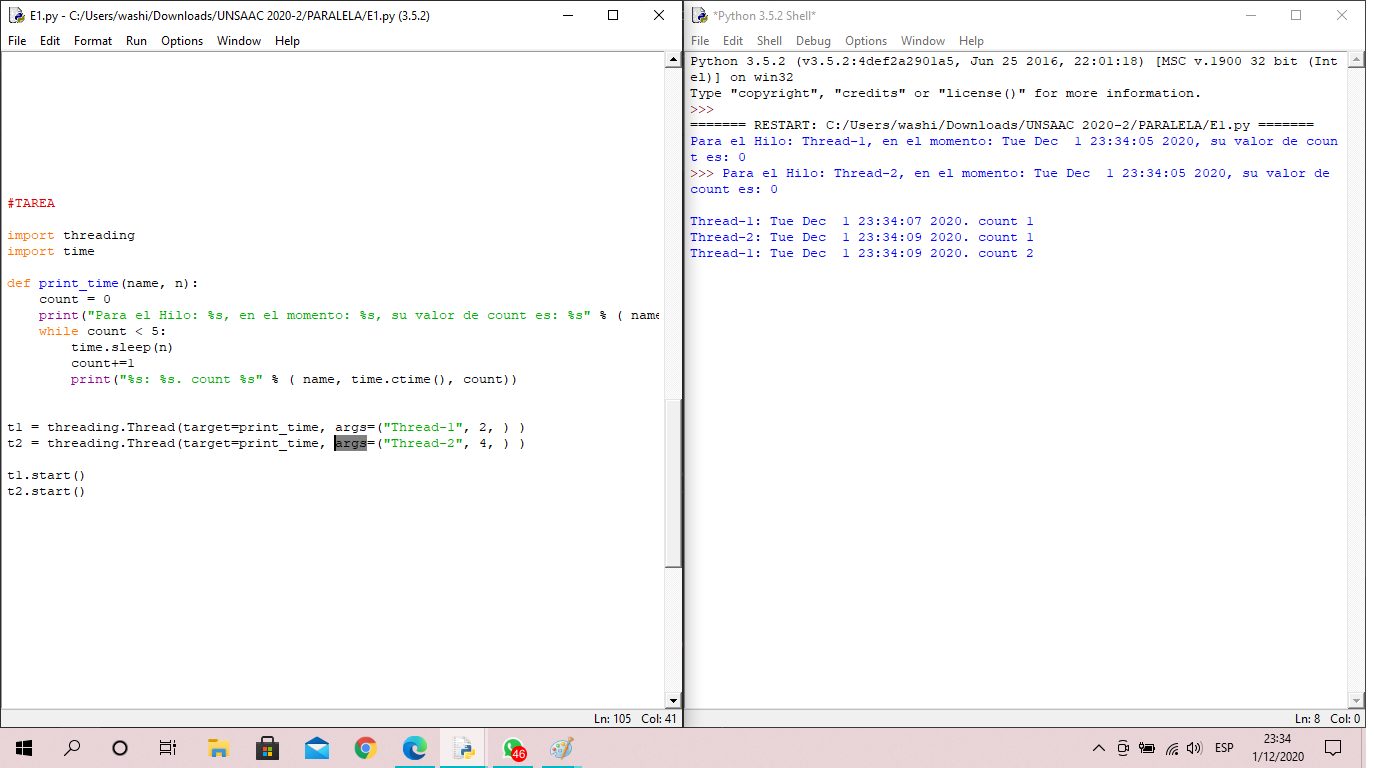

# 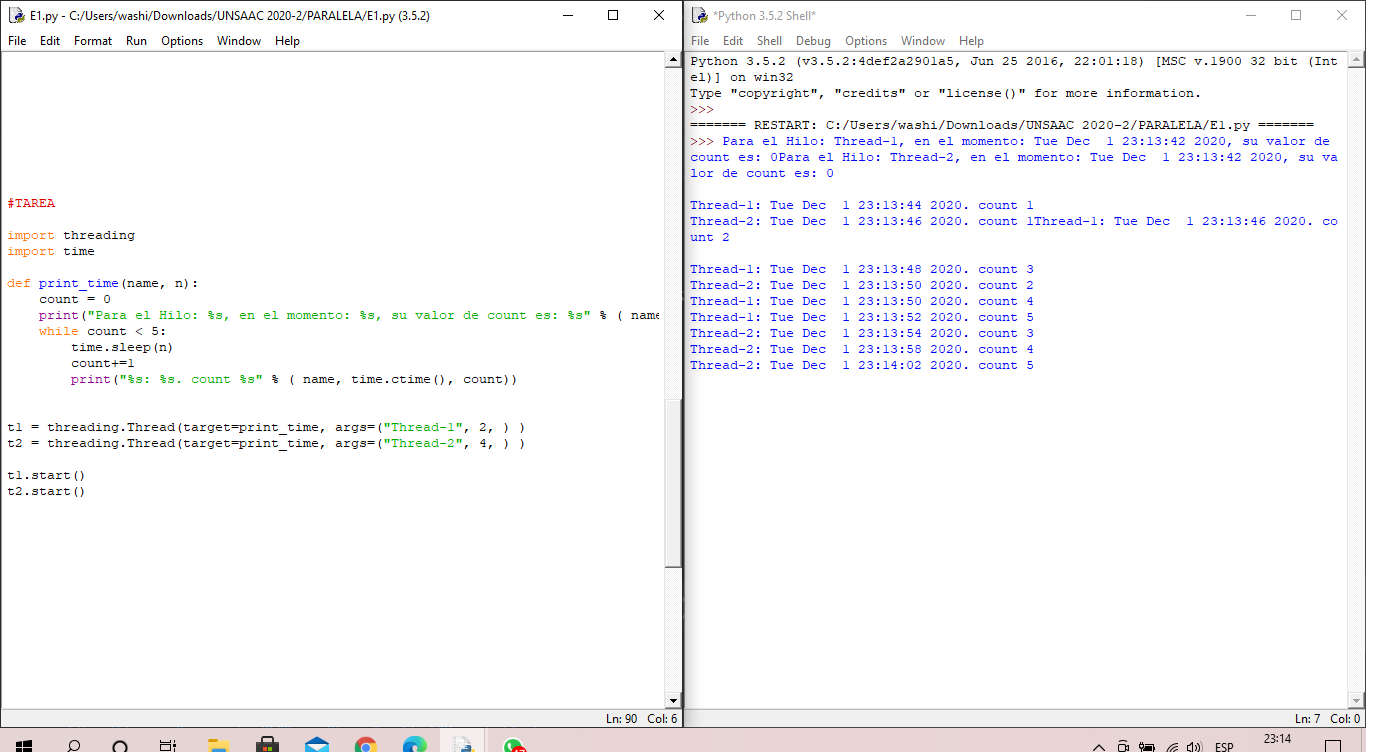

Fuentes: 
http://codigo-python.blogspot.com/2016/11/hilos-y-procesos-i.html

https://www.tutorialspoint.com/python3/time_sleep.htm

https://docs.python.org/es/3/library/threading.html#thread-objects

https://en.wikipedia.org/wiki/Flynn%27s_taxonomy

https://github.com/antonioam82/ejercicios-python